In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Wholesale.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
x = data.drop(['Channel', 'Region'], axis=1)

In [7]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


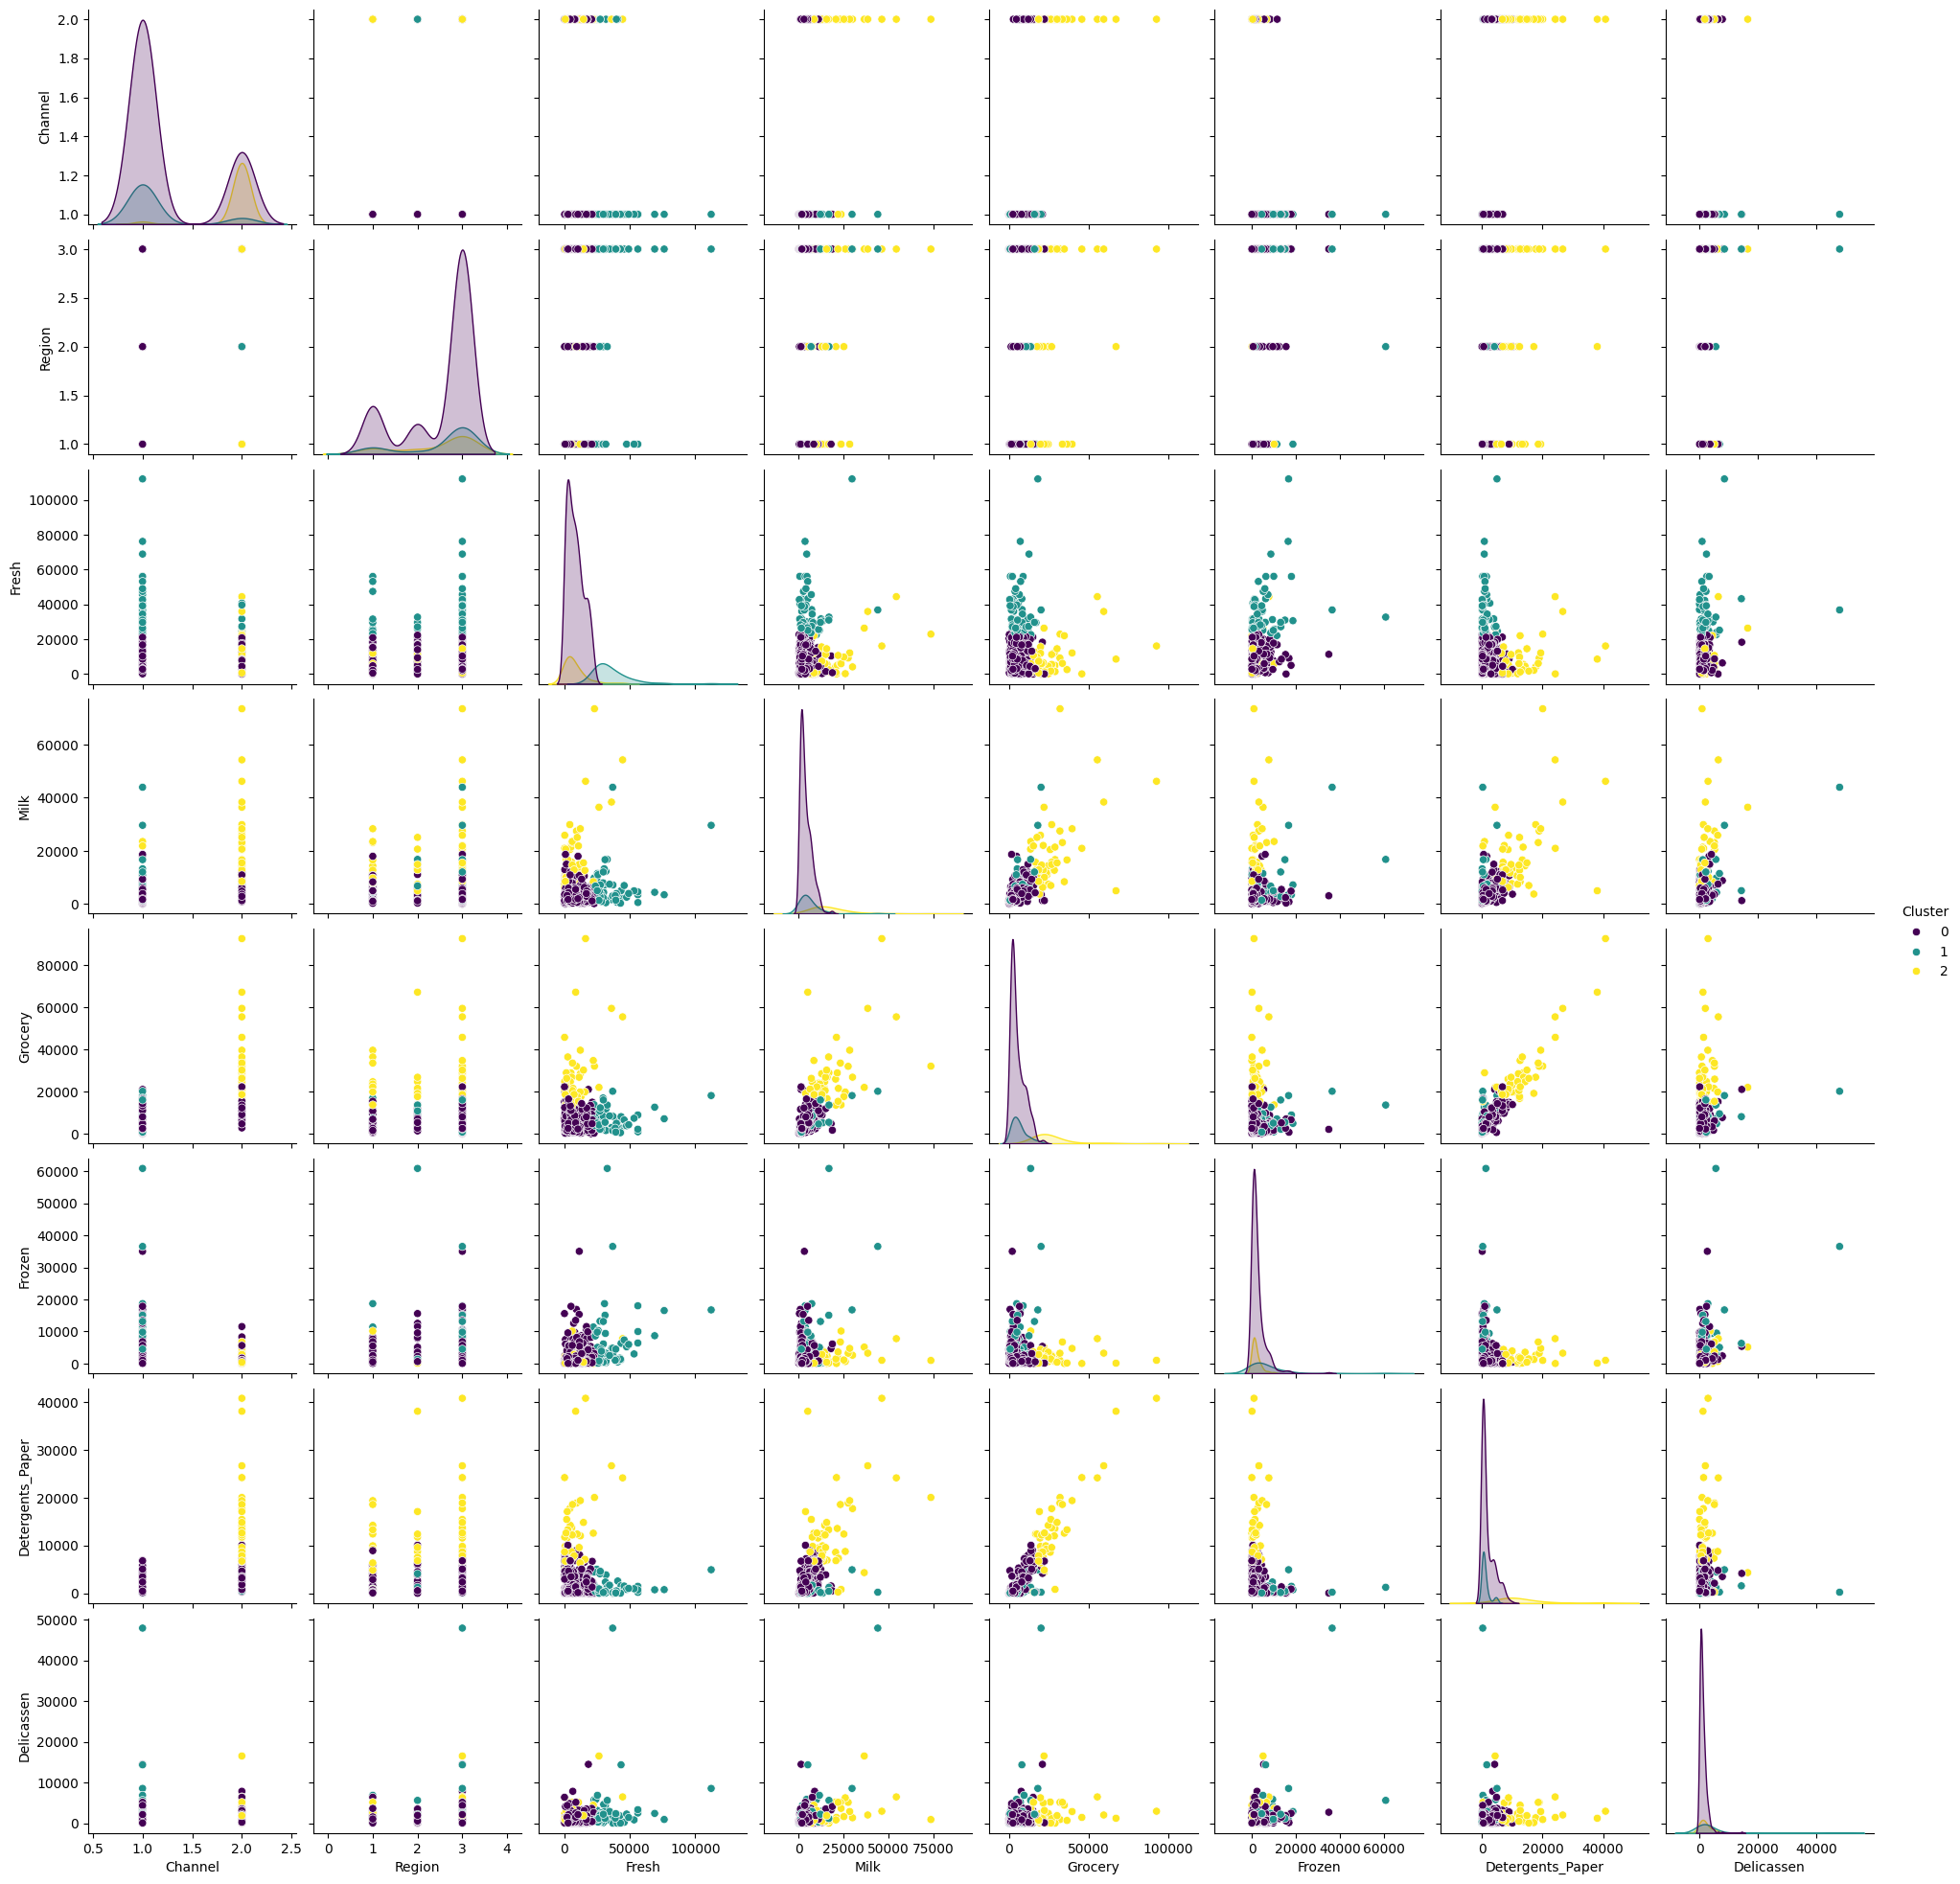

In [8]:
sns.pairplot(data, hue='Cluster', palette='viridis')
plt.show()

## **Evaluating the Optimal Number of Clusters**

In [9]:
from sklearn.metrics import silhouette_score
import numpy as np

In [11]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

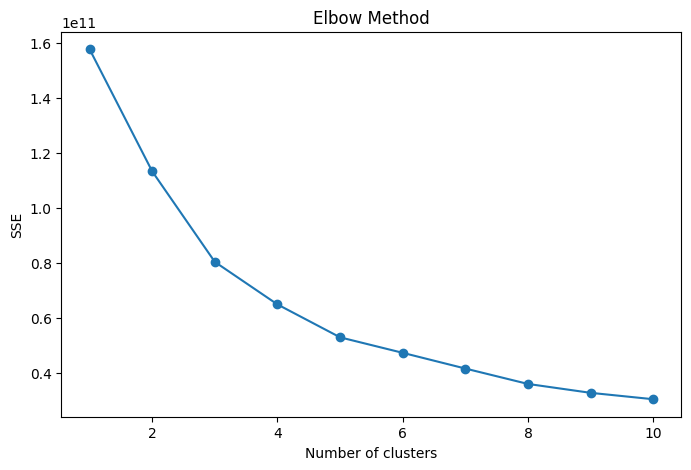

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [15]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(x)
    silhouette_scores.append(silhouette_score(x, labels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

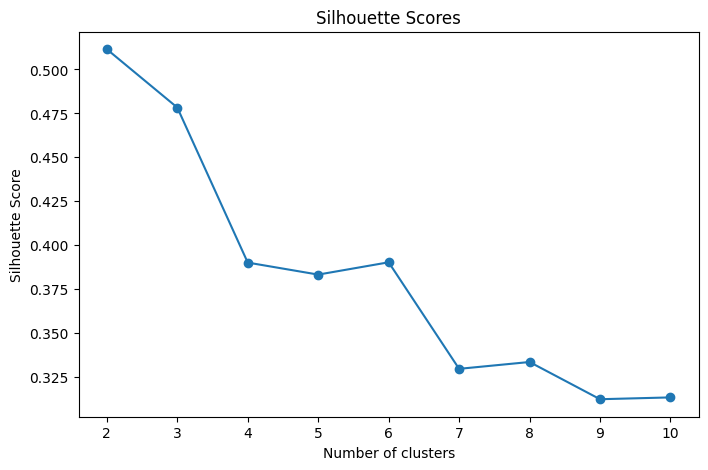

In [16]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

## **Cluster Analysis and Interpretation**

In [19]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=x.columns)
cluster_centers.index.name = 'Cluster'
cluster_centers.reset_index(inplace=True)

In [20]:
cluster_centers

,Cluster,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,4443.229885,8716.586207,12616.689655,1456.172414,5391.333333,1512.425287
1,1,26442.365854,5742.609756,7438.756098,4762.048780,1495.585366,2359.097561
2,2,26272.500000,35951.250000,68811.750000,3048.250000,32450.250000,3160.250000
3,3,44408.105263,3175.368421,4057.473684,4617.315789,757.000000,2159.052632
4,4,22925.000000,73498.000000,32114.000000,987.000000,20070.000000,903.000000
5,5,4850.653595,2529.483660,3074.424837,2552.705882,828.588235,840.764706
6,6,6683.066667,17468.033333,26658.933333,1986.300000,11872.900000,2531.200000
7,7,34782.000000,30367.000000,16898.000000,48701.500000,755.500000,26776.000000
8,8,15681.190000,2696.350000,3696.580000,3392.790000,822.890000,1180.740000
9,9,85779.666667,12503.666667,12619.666667,13991.666667,2159.000000,3958.000000


## **Dendrogram and Cluster Formation**

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [23]:
Z = linkage(x, method='ward')

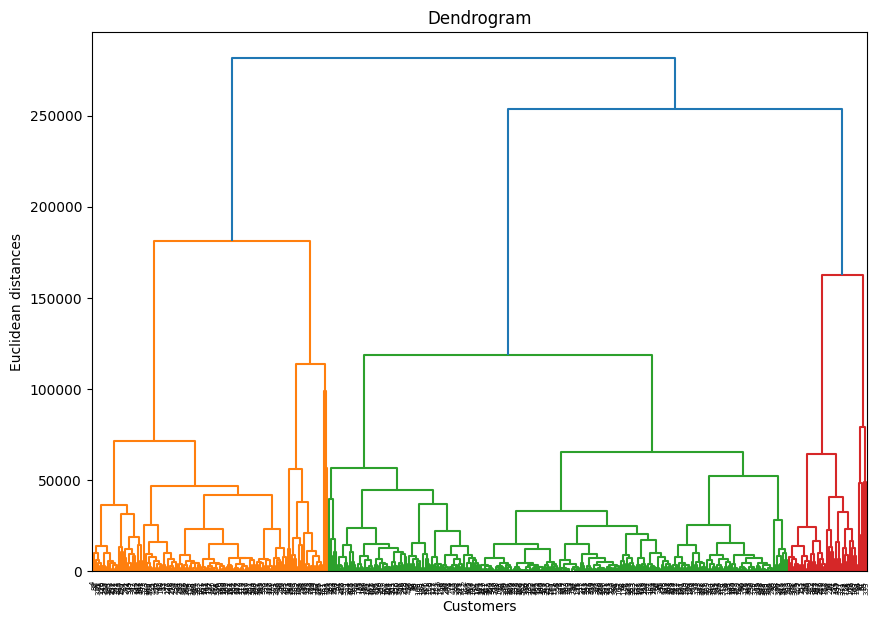

In [24]:
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [26]:
from scipy.cluster.hierarchy import fcluster
data['Hierarchical Cluster'] = fcluster(Z, t=3, criterion='maxclust')

## **Comparison of Clustering Results**

In [27]:
comparison = pd.crosstab(data['Cluster'], data['Hierarchical Cluster'])
comparison

Hierarchical Cluster,1,2,3
Cluster,,,
0,74,254,2
1,60,0,0
2,0,7,43
